# Linear ⁠Regression

In [ ]:
! pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Load Excel dataset (Update file path)
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/autos_resale_Dataset.xlsx"
df_raw = pd.read_excel(file_path, sheet_name="autos")  # Read "auto" sheet

# Drop irrelevant columns
drop_cols = ["index", "name","dateCrawled", "dateCreated", "lastSeen", "nrOfPictures", "postalCode"]
df = df_raw.drop(columns=drop_cols, errors='ignore')

# Convert categorical variables into numerical using One-Hot Encoding
categorical_cols = ["seller", "offerType", "vehicleType", "gearbox", "model", "fuelType", "brand", "notRepairedDamage"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target variable

In [7]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Model Performance:\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")

# Feature Importance (Weights)
feature_importance = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
feature_importance = feature_importance.sort_values(by="Weight", ascending=False)



✅ Model Performance:
MSE: 298615819301.89
R² Score: -0.03



🔹 Feature Weights (Importance in Prediction):
                  Feature        Weight
302  brand_sonstige_autos  83824.518231
1                 powerPS  30087.124145
289   brand_mercedes_benz  23516.272905
16              model_145  20276.666012
13        gearbox_manuell  14201.111164
131            model_golf  12317.329901
53           model_andere  11823.507188
271             brand_bmw   9787.096609
44               model_a6   9234.459490
184          model_passat   9173.266726


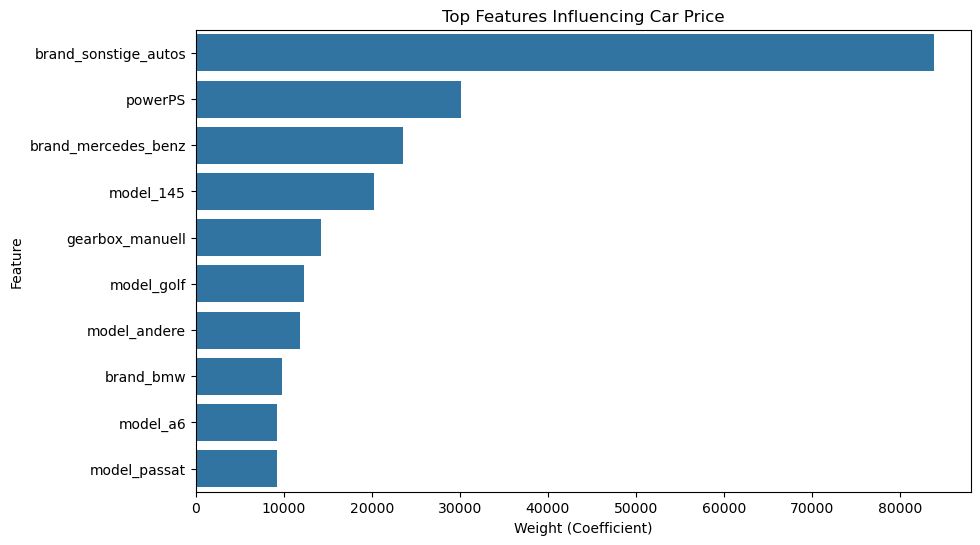

In [8]:

# Display feature importance
print("\n🔹 Feature Weights (Importance in Prediction):")
print(feature_importance.head(10))  # Display top 10 features

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Weight", y="Feature", data=feature_importance[:10])  # Show top 10 features
plt.title("Top Features Influencing Car Price")
plt.xlabel("Weight (Coefficient)")
plt.ylabel("Feature")
plt.show()


In [12]:
# Key Numerical & Categorical Variables and Their Relationship with Price
print("\n🔹 Numerical Variable Summary:")
print(df_raw[["price", "yearOfRegistration", "powerPS", "kilometer"]].describe())

# Count values for categorical variables
categorical_vars = ["fuelType", "vehicleType", "gearbox", "brand", "seller", "notRepairedDamage"]
for cat in categorical_vars:
    print(f"\n🔹 {cat} Distribution:")
    print(df_raw[cat].value_counts())



🔹 Numerical Variable Summary:
              price  yearOfRegistration        powerPS      kilometer
count  3.715270e+05       371527.000000  371527.000000  371527.000000
mean   1.729518e+04         2004.577993     115.549513  125618.622603
std    3.587959e+06           92.866723     192.139835   40112.371090
min    0.000000e+00         1000.000000       0.000000    5000.000000
25%    1.150000e+03         1999.000000      70.000000  125000.000000
50%    2.950000e+03         2003.000000     105.000000  150000.000000
75%    7.200000e+03         2008.000000     150.000000  150000.000000
max    2.147484e+09         9999.000000   20000.000000  150000.000000

🔹 fuelType Distribution:
fuelType
benzin     223856
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: count, dtype: int64

🔹 vehicleType Distribution:
vehicleType
limousine     95894
kleinwagen    80023
kombi         67563
bus           30201
cabrio        22898
coupe      

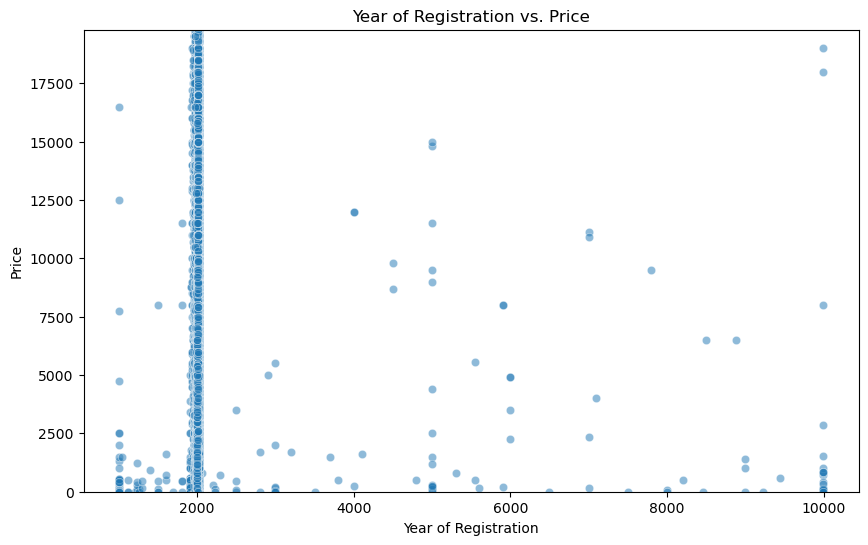

In [13]:
# Relationship Between Year of Registration & Price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["yearOfRegistration"], y=df["price"], alpha=0.5)
plt.title("Year of Registration vs. Price")
plt.xlabel("Year of Registration")
plt.ylabel("Price")
plt.ylim(0, df["price"].quantile(0.95))  # Remove extreme outliers
plt.show()


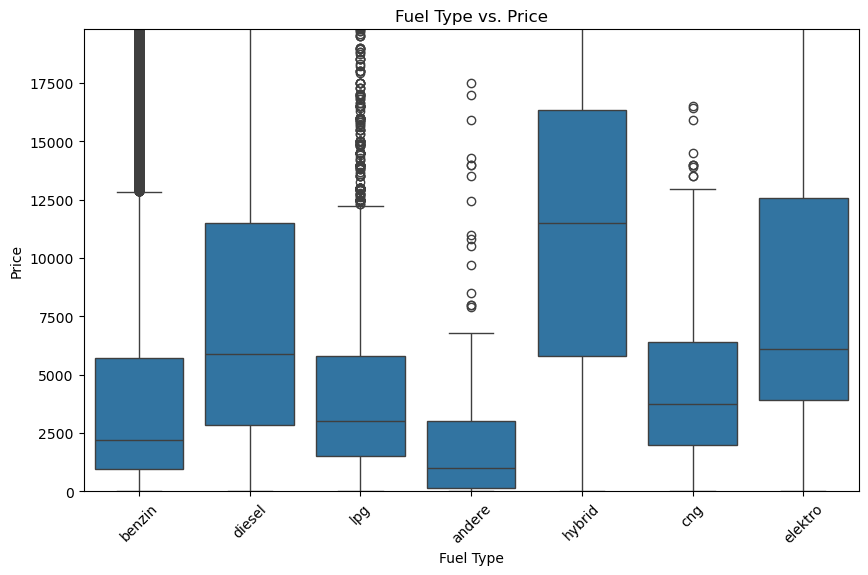

In [15]:
# Impact of Fuel Type on Car Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw["fuelType"], y=df["price"])
plt.title("Fuel Type vs. Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.ylim(0, df["price"].quantile(0.95))  # Remove extreme outliers
plt.xticks(rotation=45)
plt.show()


In [18]:
# Simple Regression Model (Year + Kilometer)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select features
X = df[["yearOfRegistration", "kilometer"]]
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get regression coefficients
print("\n🔹 Regression Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"yearOfRegistration Coefficient: {model.coef_[0]:.2f}")
print(f"kilometer Coefficient: {model.coef_[1]:.2f}")

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
print(f"\n✅ R² Score: {r2:.4f}")



🔹 Regression Coefficients:
Intercept: 44393.01
yearOfRegistration Coefficient: -9.04
kilometer Coefficient: -0.06

✅ R² Score: -0.0003


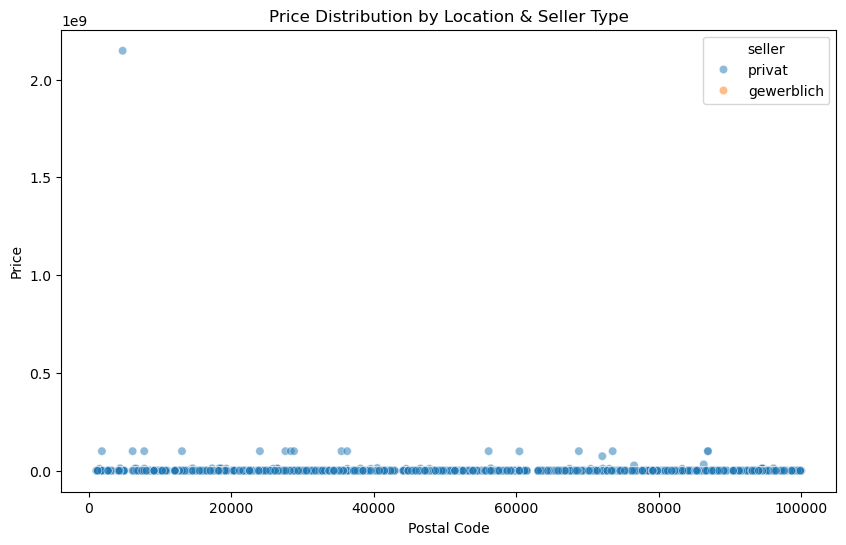

In [19]:
# Seller Type Analysis (Private vs Dealer)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_raw["postalCode"], y=df_raw["price"], hue=df_raw["seller"], alpha=0.5)
plt.title("Price Distribution by Location & Seller Type")
plt.xlabel("Postal Code")
plt.ylabel("Price")
plt.show()
